In [3]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
columns = np.arange(0,44) # read the 43 columns
names = ["srcip", "srcport", "dstip", "dstport", "proto",
         "total_fpackets", "total_fvolume", "total_bpackets", "total_bvolume", "min_fpktl",
         "mean_fpktl", "max_fpktl", "std_fpktl", "min_bpktl", "mean_bpktl",
         "max_bpktl", "std_bkptl", "min_fiat", "mean_fiat", "max_fiat",
         "std_fiat", "min_biat", "mean_biat", "max_biat", "std_biat",
         "duration", "min_active", "mean_active", "max_active", "std_active",
         "min_idle", "mean_idle", "max_idle", "std_idle", "sflow_fpackets",
         "sflow_fbytes", "sflow_bpackets", "sflow_bbytes", "fpsh_cnt", "bpsh_cnt",
         "furg_cnt", "burg_cnt", "total_fhlen", "total_bhlen"]
zeus_filename = "files/all_zeus.csv" # declare filenames
normal_filename = "files/all_normal.csv" #  declare file names
df_zeus = pd.read_csv(zeus_filename, usecols=columns, names=names) # read files (df data frame)
df_zeus['is_botnet'] = 1 #  all exampole sin zeus file are botnets
print(len(df_zeus)) # 
df_zeus.head() #  first 5 columns 

524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,10.0.2.19,1039,10.0.2.1,53,17,1,56,1,72,56,...,56,1,72,0,0,0,0,28,20,1
1,10.0.2.2,1037,239.255.255.250,1900,17,3,483,0,0,161,...,161,0,0,0,0,0,0,68,0,1
2,10.0.2.19,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
3,10.0.2.1,67,10.0.2.19,68,17,2,661,0,0,328,...,661,0,0,0,0,0,0,48,0,1
4,10.0.2.2,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1


In [8]:
normal_df = pd.read_csv(normal_filename, usecols=columns, names=names)
normal_df['is_botnet'] = 0
print(len(normal_df))
df_normal = normal_df.iloc[:len(df_zeus), :]
print(len(df_normal))
df_normal.head(10) #  exactly same thing but not botnet we have 843 rows

843
524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,192.168.0.58,50245,216.58.213.99,443,6,5,729,3,1562,40,...,729,3,1562,1,0,0,0,212,132,0
1,192.168.0.58,50240,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
2,192.168.0.58,50239,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
3,192.168.0.58,50243,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
4,192.168.0.58,50261,216.58.206.78,443,6,6,769,5,3009,40,...,769,5,3009,1,1,0,0,252,212,0
5,192.168.0.58,50263,216.58.206.130,443,6,6,781,4,3032,40,...,781,4,3032,1,0,0,0,264,172,0
6,192.168.0.58,50267,40.77.229.141,443,6,17,14162,27,12726,40,...,14162,27,12726,6,13,0,0,692,1092,0
7,192.168.0.58,50269,216.58.212.99,443,6,10,1204,9,4455,40,...,1204,9,4455,4,4,0,0,412,372,0
8,192.168.0.58,50273,191.232.139.2,443,6,14,6178,15,6023,40,...,6178,15,6023,6,9,0,0,572,612,0
9,192.168.0.58,50275,188.121.36.239,80,6,6,696,6,2519,40,...,696,6,2519,1,1,0,0,252,252,0


In [9]:
data = pd.concat([df_zeus, df_normal])
print(len(data))
data = data.sample(frac=1)
data.head()

1048


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
68,10.0.5.10,16366,123.110.29.61,23032,17,1,168,0,0,168,...,168,0,0,0,0,0,0,28,0,1
507,10.0.3.7,27889,87.23.48.1,24990,17,1,289,0,0,289,...,289,0,0,0,0,0,0,28,0,1
423,10.0.0.11,26285,173.166.22.225,12538,17,2,327,5,2093,125,...,327,5,2093,0,0,0,0,48,100,1
481,10.0.3.20,1035,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
403,10.0.0.11,1034,173.194.70.147,80,6,5,373,5,854,40,...,373,5,854,1,1,0,0,208,208,1


In [10]:
data[data.isnull().any(axis=1)].head()

,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet


In [11]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

In [12]:
data.isnull().any(axis=0)

srcip             False
srcport           False
dstip             False
dstport           False
proto             False
total_fpackets    False
total_fvolume     False
total_bpackets    False
total_bvolume     False
min_fpktl         False
mean_fpktl        False
max_fpktl         False
std_fpktl         False
min_bpktl         False
mean_bpktl        False
max_bpktl         False
std_bkptl         False
min_fiat          False
mean_fiat         False
max_fiat          False
std_fiat          False
min_biat          False
mean_biat         False
max_biat          False
std_biat          False
duration          False
min_active        False
mean_active       False
max_active        False
std_active        False
min_idle          False
mean_idle         False
max_idle          False
std_idle          False
sflow_fpackets    False
sflow_fbytes      False
sflow_bpackets    False
sflow_bbytes      False
fpsh_cnt          False
bpsh_cnt          False
furg_cnt          False
burg_cnt        

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 68 to 372
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   srcip           1048 non-null   object
 1   srcport         1048 non-null   int64 
 2   dstip           1048 non-null   object
 3   dstport         1048 non-null   int64 
 4   proto           1048 non-null   int64 
 5   total_fpackets  1048 non-null   int64 
 6   total_fvolume   1048 non-null   int64 
 7   total_bpackets  1048 non-null   int64 
 8   total_bvolume   1048 non-null   int64 
 9   min_fpktl       1048 non-null   int64 
 10  mean_fpktl      1048 non-null   int64 
 11  max_fpktl       1048 non-null   int64 
 12  std_fpktl       1048 non-null   int64 
 13  min_bpktl       1048 non-null   int64 
 14  mean_bpktl      1048 non-null   int64 
 15  max_bpktl       1048 non-null   int64 
 16  std_bkptl       1048 non-null   int64 
 17  min_fiat        1048 non-null   int64 
 18  mean_fia

In [14]:
data.describe()

,srcport,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,mean_fpktl,max_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.0,1048.0,1048.000000,1048.000000,1048.000000
mean,34002.579198,6950.801527,13.294847,25.419847,3925.868321,34.547710,4.344807e+04,105.569656,159.251908,473.715649,...,1632.139313,13.336832,1.625758e+04,2.351145,3.907443,0.0,0.0,881.736641,1233.438931,0.500000
std,21633.969317,10215.669372,5.201378,160.799309,22571.931715,280.688187,4.124589e+05,79.705528,166.769398,1274.711514,...,7293.982042,72.355010,1.056138e+05,10.151610,26.277158,0.0,0.0,6556.541592,11113.394555,0.500239
min,67.000000,53.000000,6.000000,1.000000,54.000000,0.000000,0.000000e+00,40.000000,41.000000,54.000000,...,54.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
25%,15684.000000,53.000000,6.000000,1.000000,110.750000,0.000000,0.000000e+00,40.000000,73.000000,94.000000,...,106.750000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
50%,38529.000000,443.000000,17.000000,2.000000,316.500000,1.000000,1.885000e+02,69.000000,128.000000,207.500000,...,262.000000,1.000000,1.800000e+02,0.000000,0.000000,0.0,0.0,48.000000,20.000000,0.500000
75%,50482.250000,16563.750000,17.000000,10.000000,1244.000000,8.250000,4.003000e+03,161.000000,182.500000,494.000000,...,693.000000,6.000000,2.576750e+03,1.000000,2.000000,0.0,0.0,412.000000,358.000000,1.000000
max,65510.000000,29996.000000,17.000000,4278.000000,479966.000000,7916.000000,1.186256e+07,334.000000,2036.000000,16078.000000,...,78856.000000,1583.000000,2.372511e+06,191.000000,502.000000,0.0,0.0,182920.000000,316652.000000,1.000000


In [15]:
y=data['is_botnet']
y.value_counts()

1    524
0    524
Name: is_botnet, dtype: int64

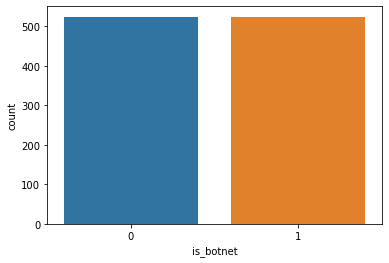

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(data= data, x = "is_botnet")
plt.show()

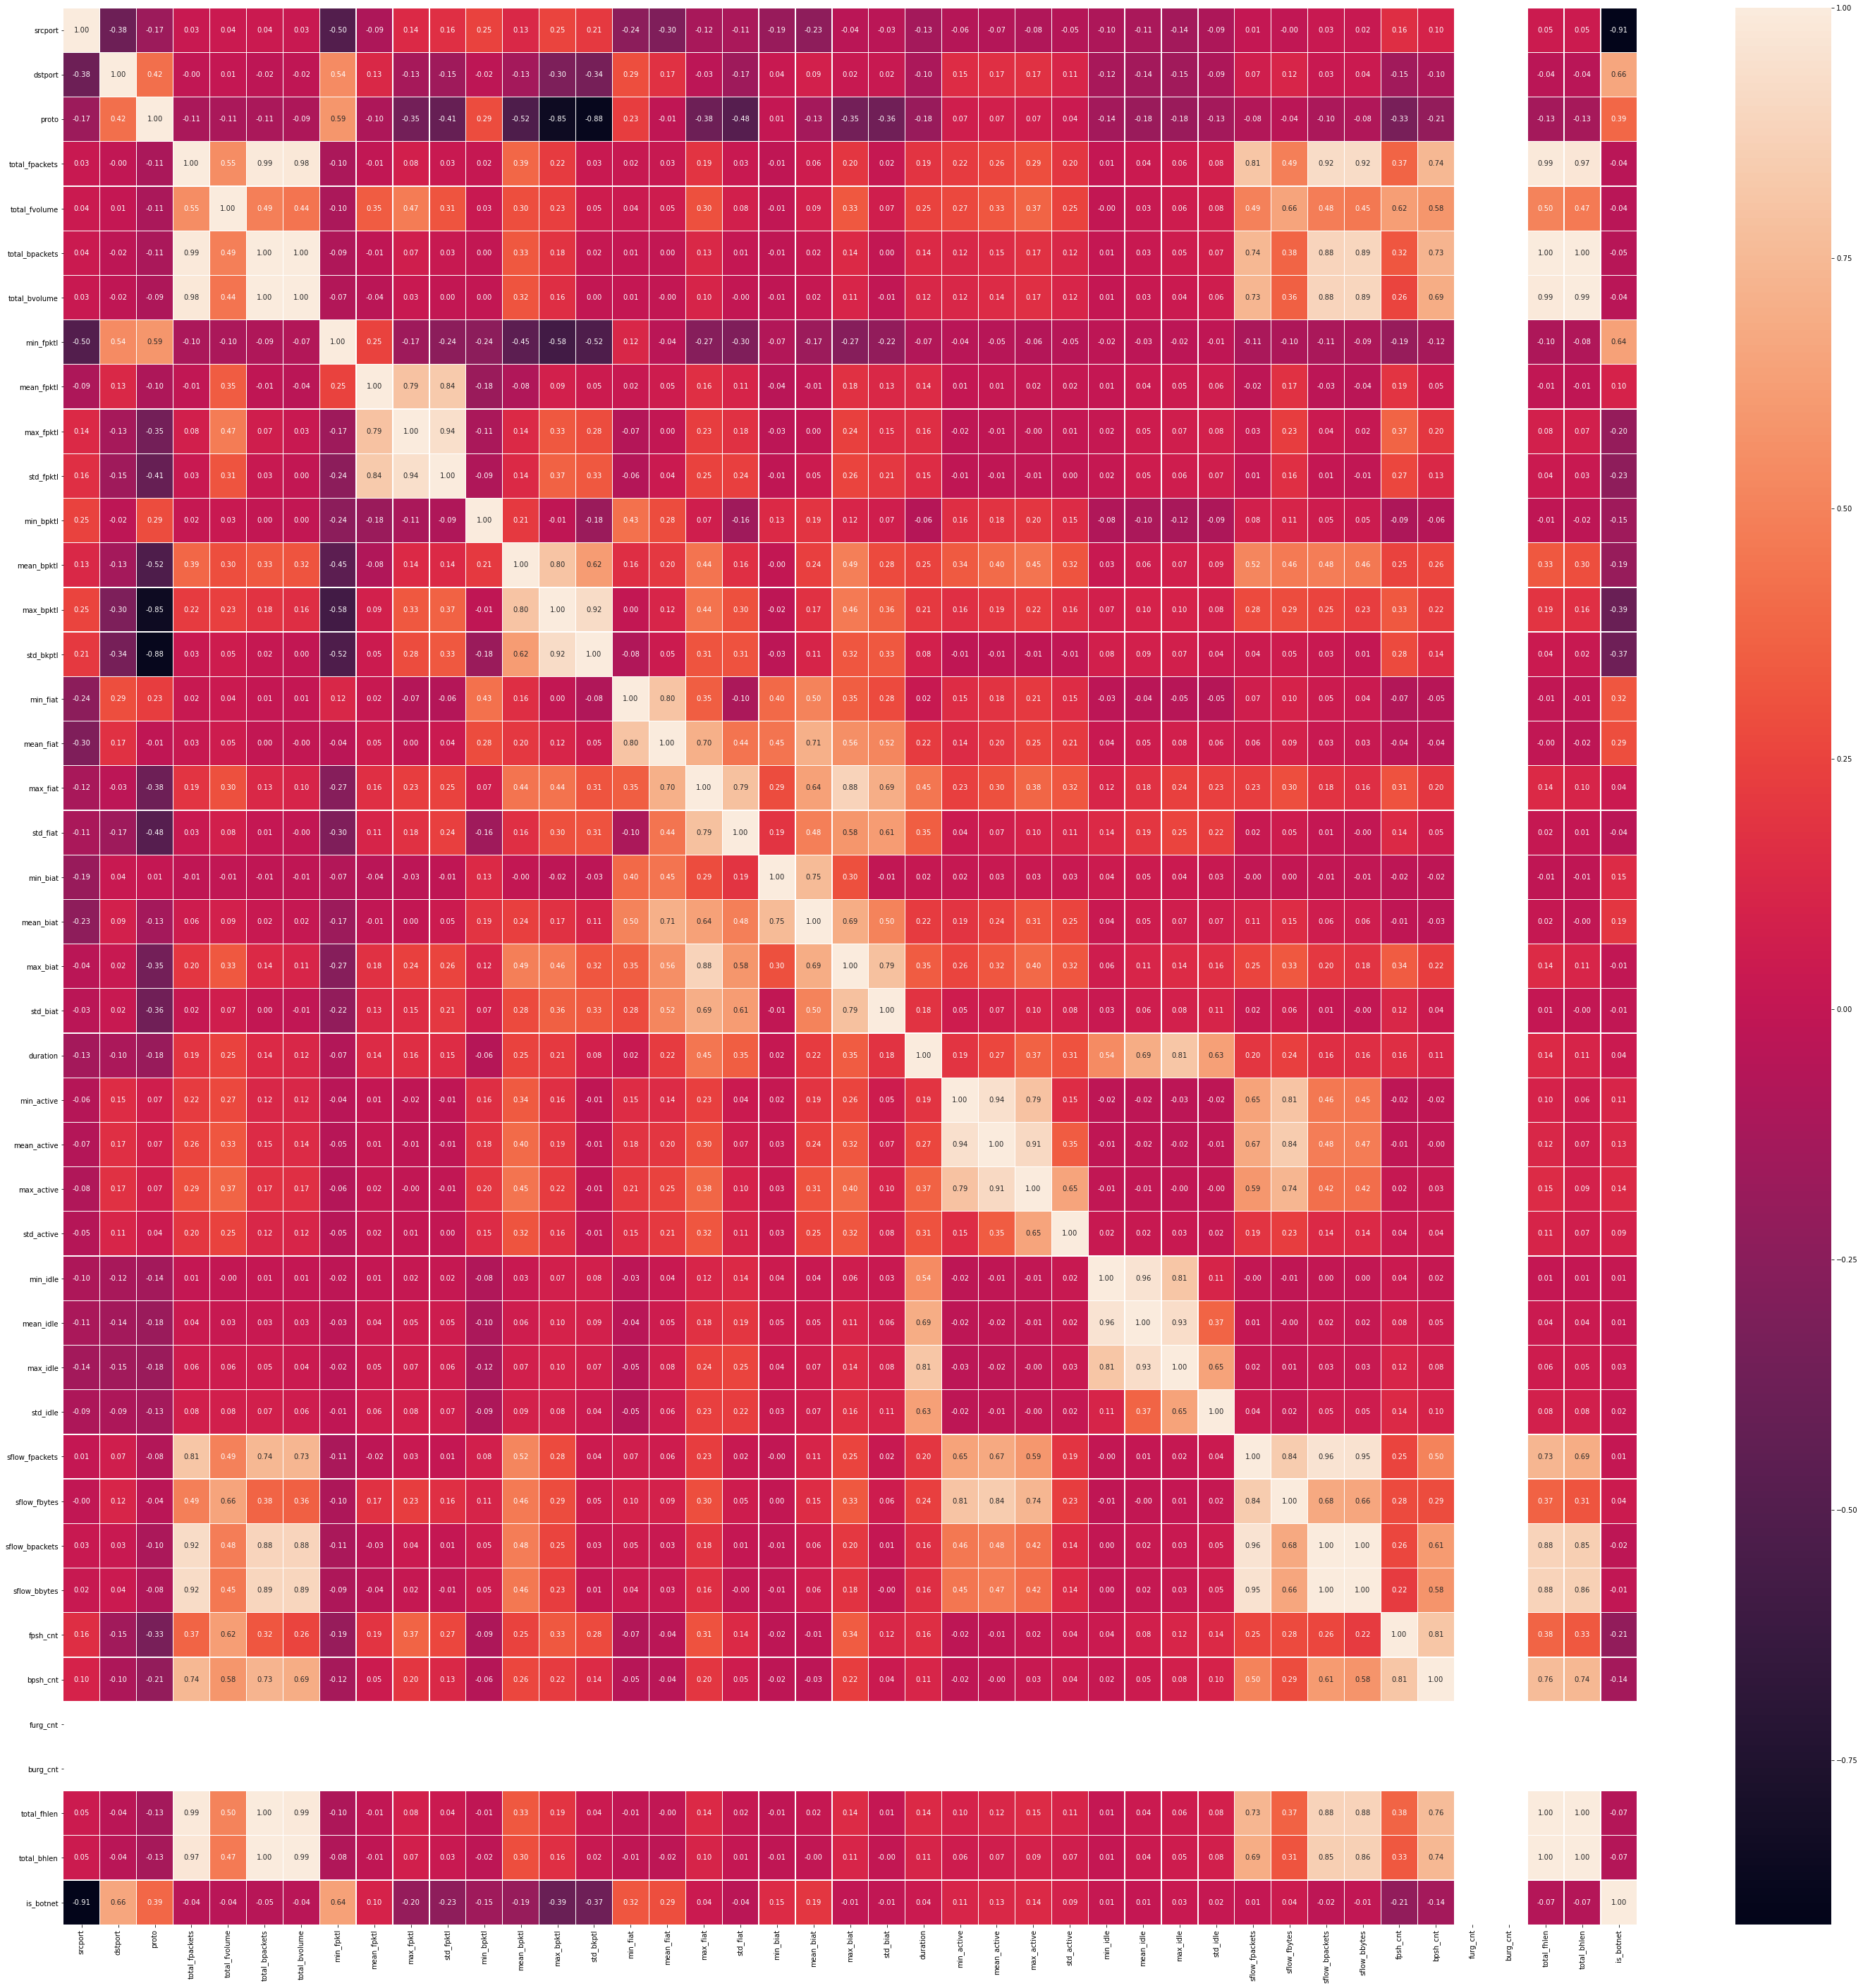

In [19]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

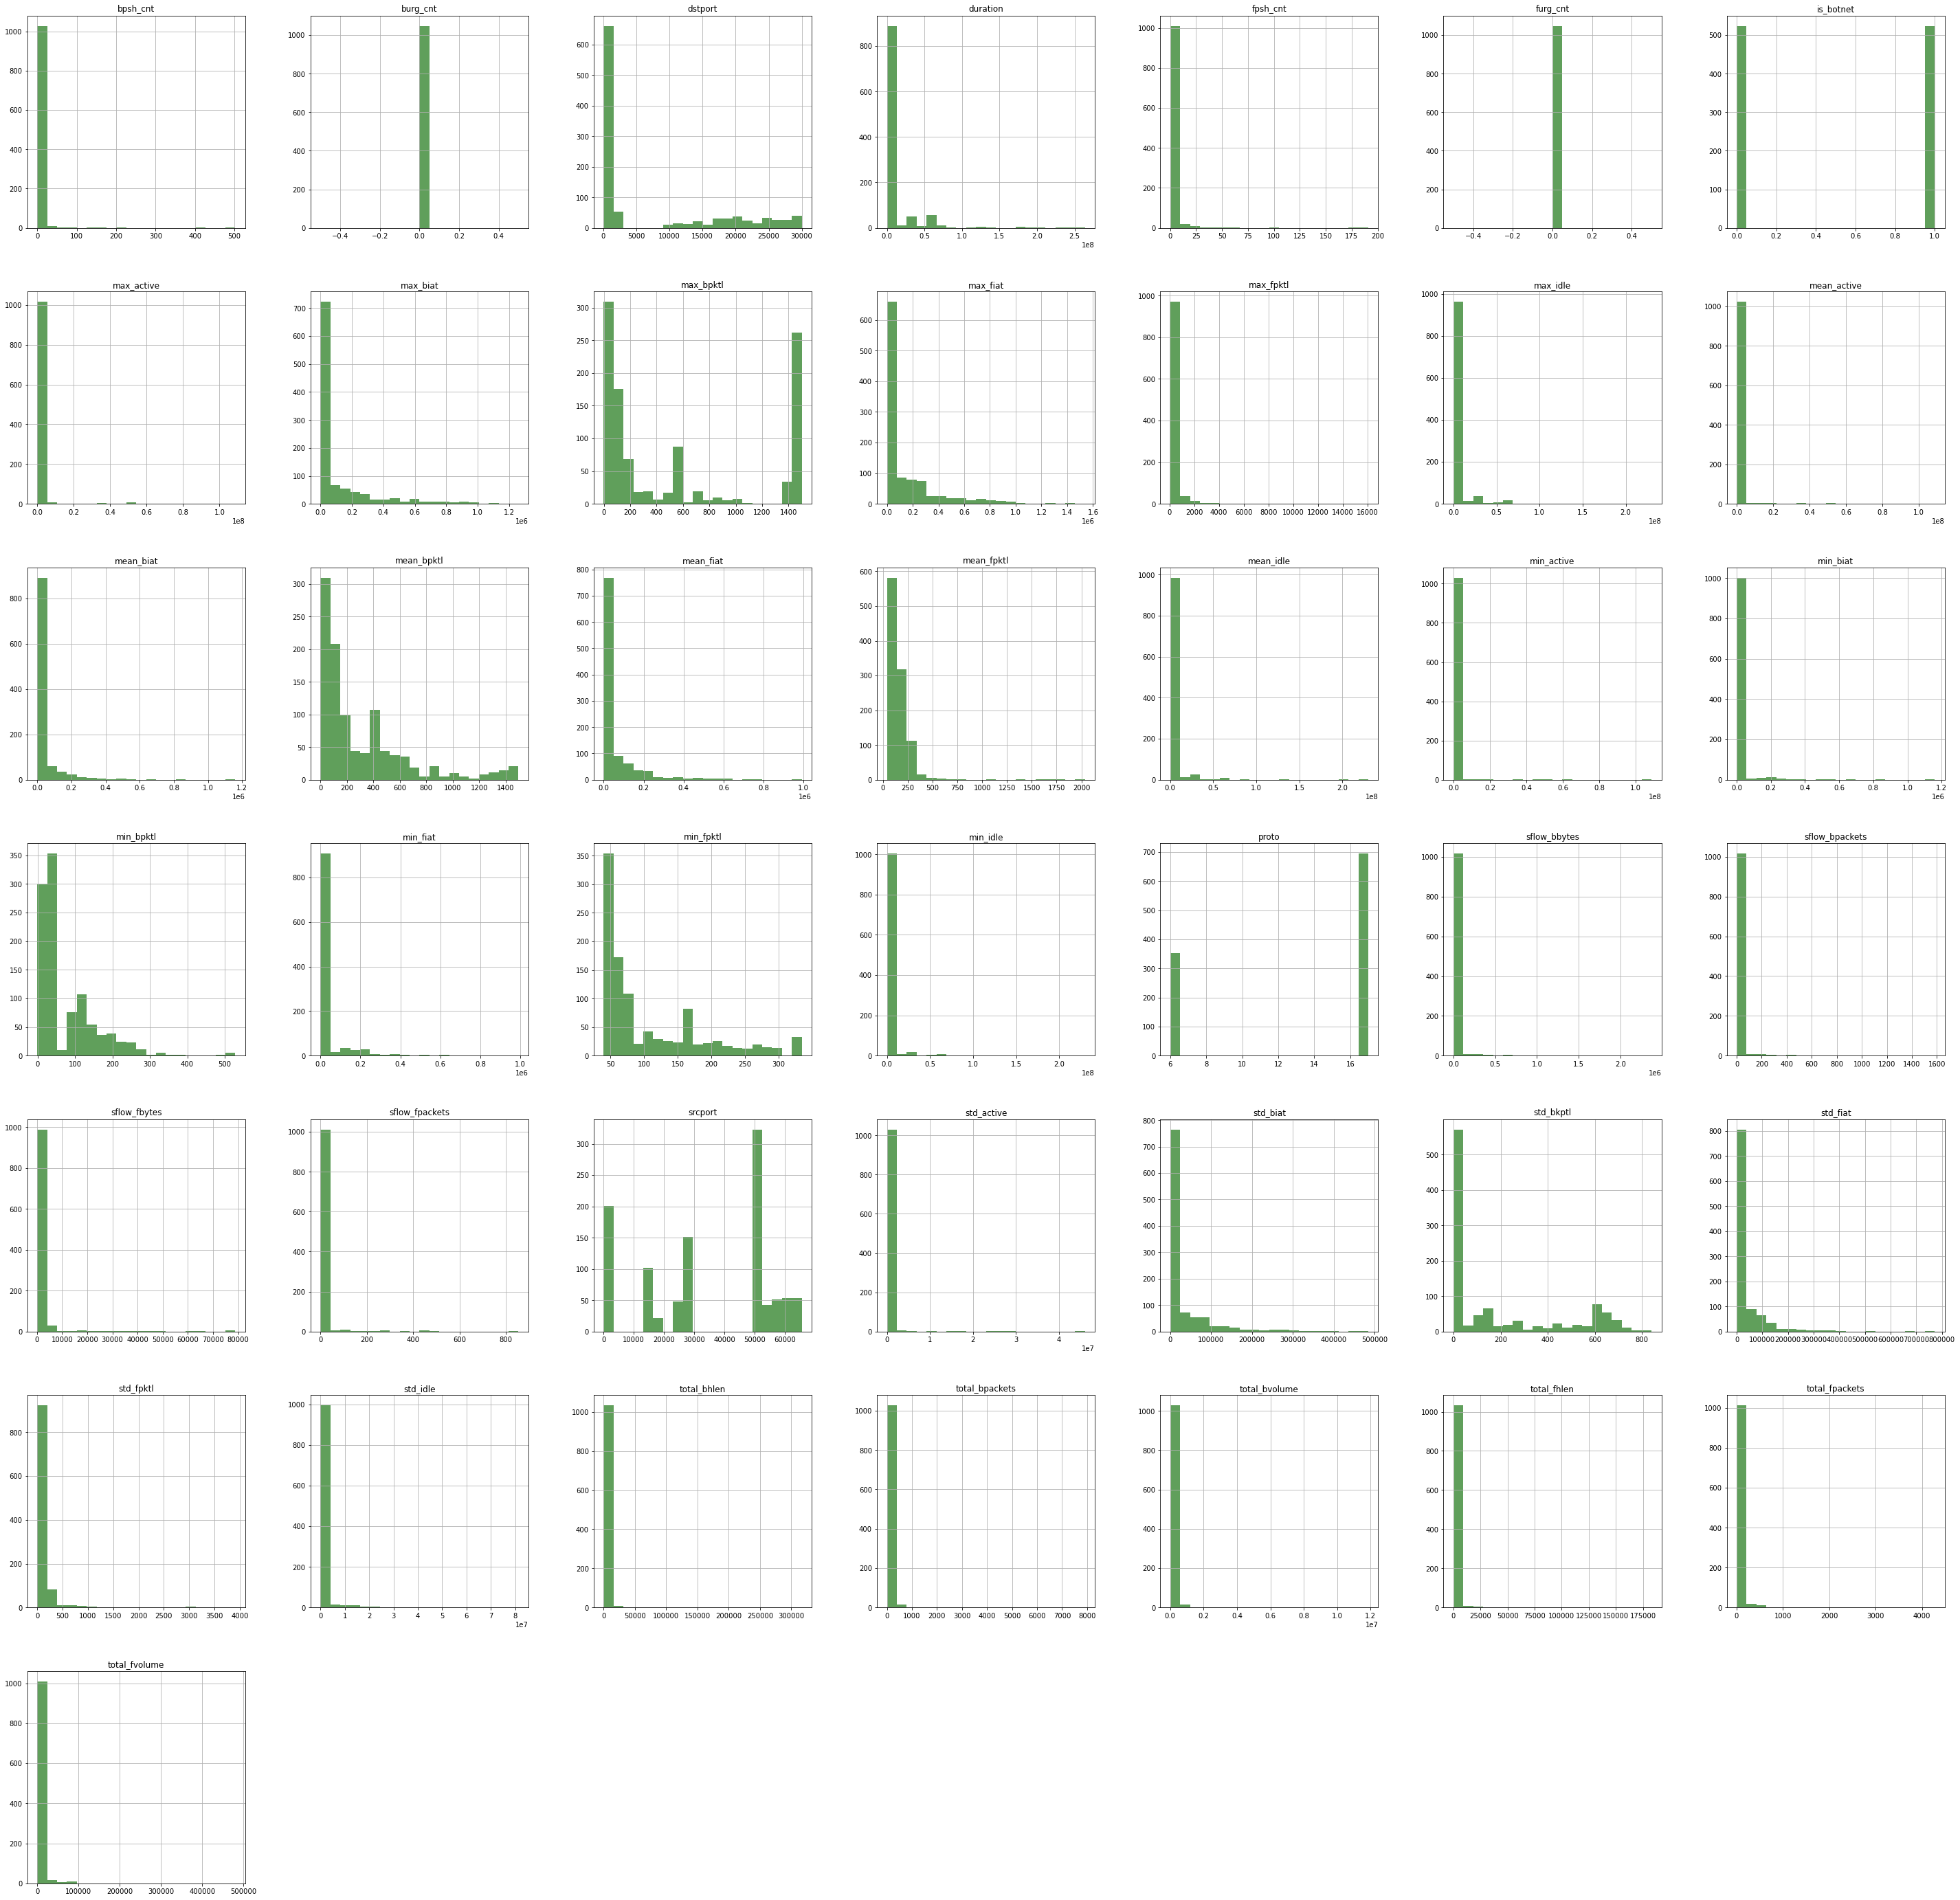

In [18]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()